In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Build a model based on census data to determine how certain census data effects bike stations and what would be other
#good locations to add new bike shares. How many rides based on the area and what is the demographic like around the station

In [3]:
data_ny=pd.read_csv('nyc_census_tracts.csv',keep_default_na=False, na_values=[""])
data_ny.head()


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [4]:
data_ny.columns

Index(['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
data_census=pd.read_csv('census_block_loc.csv',keep_default_na=False, na_values=[""])
data_census.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [6]:
data_census['BlockCode_11'] = data_census['BlockCode'].apply(lambda x: int(str(x)[0:11]))

In [7]:
df= pd.merge(left=data_ny,right= data_census, how='inner', on=None, left_on='CensusTract', right_on='BlockCode_11',
        left_index=False, right_index=False, sort=True,
        suffixes=('_x', '_y'), copy=True, indicator=False,
        validate=None)
df.head

<bound method NDFrame.head of        CensusTract  County_x        Borough  TotalPop   Men  Women  Hispanic  \
0      36005000100     Bronx          Bronx      7703  7133    570      29.9   
1      36005000100     Bronx          Bronx      7703  7133    570      29.9   
2      36005000100     Bronx          Bronx      7703  7133    570      29.9   
3      36005000100     Bronx          Bronx      7703  7133    570      29.9   
4      36005000100     Bronx          Bronx      7703  7133    570      29.9   
5      36005000100     Bronx          Bronx      7703  7133    570      29.9   
6      36005000100     Bronx          Bronx      7703  7133    570      29.9   
7      36005000100     Bronx          Bronx      7703  7133    570      29.9   
8      36005000100     Bronx          Bronx      7703  7133    570      29.9   
9      36005000100     Bronx          Bronx      7703  7133    570      29.9   
10     36005000100     Bronx          Bronx      7703  7133    570      29.9   
11     360

In [8]:
df.columns

Index(['CensusTract', 'County_x', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Latitude', 'Longitude',
       'BlockCode', 'County_y', 'State', 'BlockCode_11'],
      dtype='object')

In [9]:
bike=pd.read_csv('201907-citibike-tripdata.csv', keep_default_na=False, na_values=[""])
bike.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493,W 45 St & 6 Ave,40.756800,-73.982912,454,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143,5 Ave & E 78 St,40.776321,-73.964274,3226,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317,E 6 St & Avenue B,40.724537,-73.981854,3469,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249,Harrison St & Hudson St,40.718710,-74.009001,369,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552,W 113 St & Broadway,40.805973,-73.964928,3538,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1


In [10]:
bike.columns = bike.columns.str.replace(' ', '_') 
bike.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493,W 45 St & 6 Ave,40.756800,-73.982912,454,E 51 St & 1 Ave,40.754557,-73.965930,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143,5 Ave & E 78 St,40.776321,-73.964274,3226,W 82 St & Central Park West,40.782750,-73.971370,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317,E 6 St & Avenue B,40.724537,-73.981854,3469,India St & West St,40.731814,-73.959950,39874,Subscriber,1986,1
3,1660,2019-07-01 00:00:08.6010,2019-07-01 00:27:48.8050,249,Harrison St & Hudson St,40.718710,-74.009001,369,Washington Pl & 6 Ave,40.732241,-74.000264,38865,Subscriber,1988,1
4,109,2019-07-01 00:00:12.1580,2019-07-01 00:02:01.5670,3552,W 113 St & Broadway,40.805973,-73.964928,3538,W 110 St & Amsterdam Ave,40.802692,-73.962950,30256,Subscriber,1997,1


In [11]:
#new dataset with just station id, lat/long, number of rides

In [12]:
format = "%Y-%m-%dT%H:%M:%S"
start_time = pd.to_datetime(bike["starttime"], format=format)
end_time = pd.to_datetime(bike["stoptime"], format=format)

duration = pd.DatetimeIndex(end_time - start_time)
duration = pd.DataFrame(duration.hour*60 + duration.minute)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """


In [13]:
print(duration.describe())

                  0
count  2.181064e+06
mean   1.488386e+01
std    2.660018e+01
min    1.000000e+00
25%    6.000000e+00
50%    1.000000e+01
75%    1.900000e+01
max    1.436000e+03


In [15]:
bike['trip_duration']=bike['tripduration'].astype(int)


In [16]:
print(bike['tripduration'].describe())

count    2.181064e+06
mean     1.035360e+03
std      1.077968e+04
min      6.100000e+01
25%      3.850000e+02
50%      6.580000e+02
75%      1.155000e+03
max      2.621244e+06
Name: tripduration, dtype: float64


In [17]:
bikes = bike["bikeid"].dropna()
print(bikes.value_counts().describe())

count    14356.000000
mean       151.926999
std         80.316472
min          1.000000
25%         99.000000
50%        137.000000
75%        187.000000
max        446.000000
Name: bikeid, dtype: float64


Text(0.5, 0, 'Count of occurrences each bike was used')

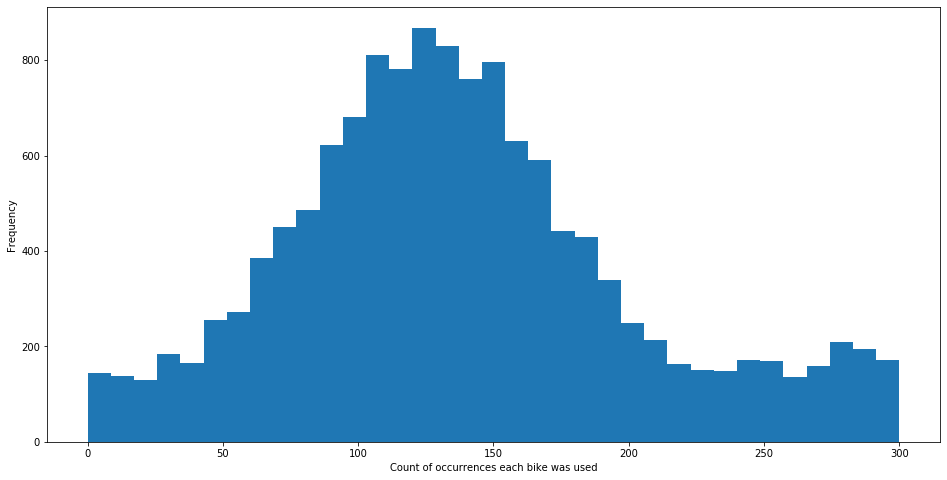

In [18]:
plt.figure(figsize=(16, 8))
bikes.value_counts().plot(kind="hist", bins=35, range=(0,300))
plt.xlabel("Count of occurrences each bike was used")

In [19]:
# There are 14356 bikes and each has been used on average 152 times. 

In [20]:
from collections import Counter
for days, count in Counter(bike["usertype"].fillna("nan")).items():
    print("days = {}, count = {}, percentage = {}%".format(days, count, int(100*count/len(bike))))


days = Subscriber, count = 1803055, percentage = 82%
days = Customer, count = 378009, percentage = 17%


In [21]:
start_station = bike["start_station_id"].dropna().value_counts()
end_station = bike["end_station_id"].dropna().value_counts()

stations = pd.concat((start_station, end_station), axis=1, sort=False)
stations = stations.reset_index(drop=True)

In [22]:
print (stations)

      start_station_id  end_station_id
0              12451.0           12333
1               9574.0            9782
2               9440.0            9467
3               9408.0           10012
4               9329.0            9601
5               9132.0            9273
6               8711.0            8750
7               8623.0            8326
8               8543.0            8501
9               8197.0            8216
10              7948.0            8204
11              7511.0            7544
12              7421.0            6695
13              7283.0            7312
14              6883.0            6931
15              6771.0            6907
16              6726.0            6714
17              6721.0            6503
18              6720.0            6785
19              6698.0            6630
20              6662.0            6409
21              6658.0            6533
22              6625.0            6571
23              6621.0            6591
24              6593.0   

In [23]:
print(len(stations))

1583


In [24]:
print(stations.corr())

                  start_station_id  end_station_id
start_station_id          1.000000        0.998435
end_station_id            0.998435        1.000000


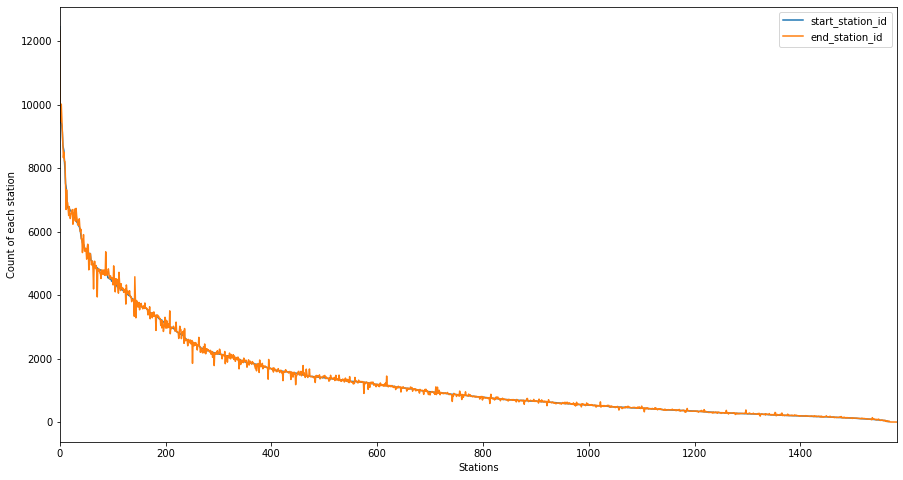

In [25]:
stations.plot(figsize=(15, 8))
plt.xlabel("Stations")
plt.ylabel("Count of each station")
plt.legend()

In [26]:
from math import sin, cos, sqrt, atan2, radians

lat1 = bike["start_station_latitude"].apply(radians)
lon1 = bike["start_station_longitude"].apply(radians)
lat2 = bike["end_station_latitude"].apply(radians)
lon2 = bike["end_station_longitude"].apply(radians)

dlon = lon2 - lon1
dlat = lat2 - lat1

R = 6373.0

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

bike['distance'] = R * c

In [27]:
bike["distance"].describe()

count    2.181064e+06
mean     1.819484e+00
std      1.450128e+00
min      0.000000e+00
25%      8.332764e-01
50%      1.403231e+00
75%      2.373937e+00
max      1.671231e+01
Name: distance, dtype: float64

Text(0.5, 0, 'km')

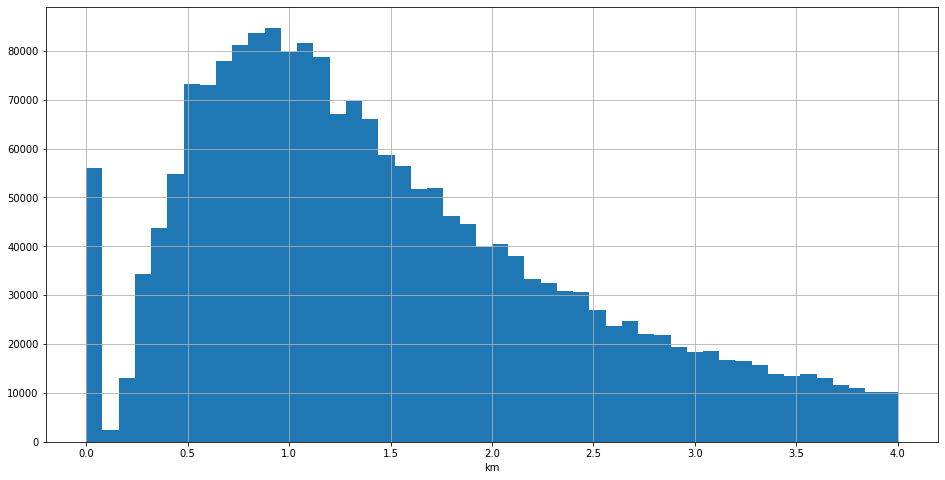

In [28]:
plt.figure(figsize=(16, 8))
bike.distance.hist(range=(0,4), bins=50)
plt.xlabel("km")

In [29]:
# showing that average/ mean ride from the stations are slightly under 2km per ride. So most likely riding from one
#station to another station. 

In [31]:
# find the distance from start station lat and long to the borough lat/long (where end station is) and then keep stations that are closest to that borough lat/long

In [32]:
df_bike = bike.groupby(['start_station_id', 'start_station_latitude','start_station_longitude']).agg('count')['tripduration']
print (df_bike)

start_station_id  start_station_latitude  start_station_longitude
72                40.767272               -73.993929                 3607
79                40.719116               -74.006667                 2082
82                40.711174               -74.000165                 1214
83                40.683826               -73.976323                 1623
116               40.741776               -74.001497                 5761
119               40.696089               -73.978034                  454
120               40.686768               -73.959282                  916
127               40.731724               -74.006744                 4880
128               40.727103               -74.002971                 5565
143               40.692395               -73.993379                 1978
144               40.698399               -73.980689                  873
146               40.716250               -74.009106                 2558
150               40.720874               -73.

In [33]:
lat1 = bike["start_station_latitude"].apply(radians)
lon1 = bike["start_station_longitude"].apply(radians)
lat2 = df["Latitude"].apply(radians)
lon2 = df["Longitude"].apply(radians)

dlon = lon2 - lon1
dlat = lat2 - lat1

R = 6373.0

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

bike['borough_distance'] = R * c

In [34]:
bike["borough_distance"].describe()

count    18052.000000
mean        17.393047
std          7.286242
min          0.126213
25%         12.391253
50%         17.706913
75%         22.313421
max         43.270509
Name: borough_distance, dtype: float64

Text(0.5, 0, 'km')

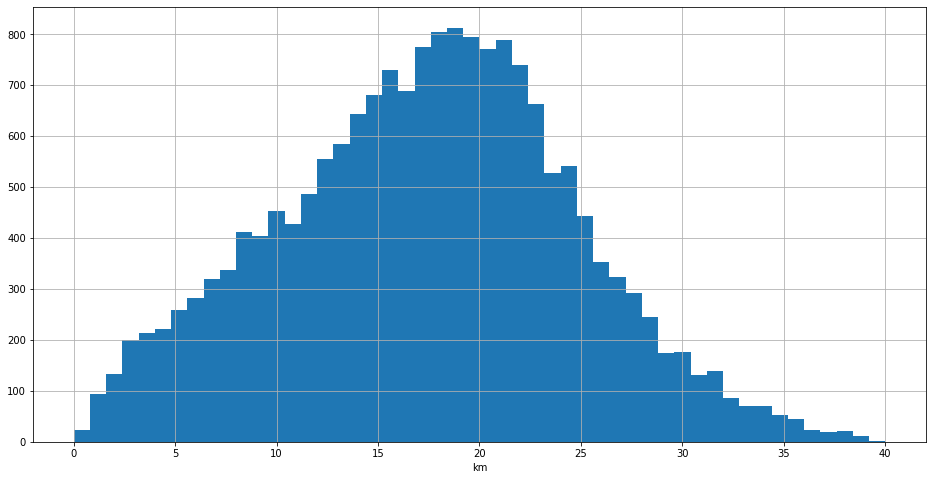

In [38]:
plt.figure(figsize=(16, 8))
bike.borough_distance.hist(range=(0,40), bins=50)
plt.xlabel("km")

In [ ]:
#use time series model to predict by borough bike rental by hour per day usage- look online for resources on bike usage.
#use sql to merge the bike and census data base, export the table from sql into a csv(in the admin section) and then reupload back into python

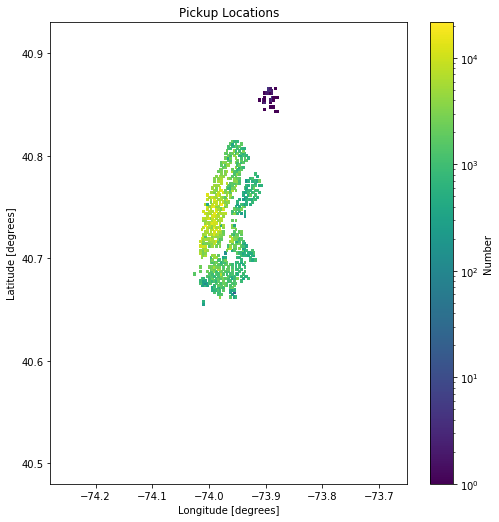

In [28]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
# ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(bike.start_station_longitude,bike.start_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Pickup Locations')
plt.colorbar(label='Number')
plt.show()

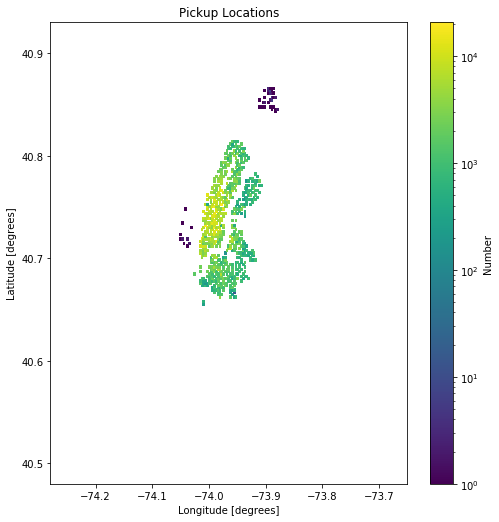

In [29]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
# ratio = np.cos(40.7 * np.pi/180) * np.abs(lonmax-lonmin) /np.abs(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(bike.end_station_longitude,bike.end_station_latitude,bins=199,
                  range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Pickup Locations')
plt.colorbar(label='Number')
plt.show()

In [ ]:
#for time series, use the plotted line charts with all 5 boroughs overlapped to show the difference in hours within day


ValueError: Could not interpret input 'bikeid'

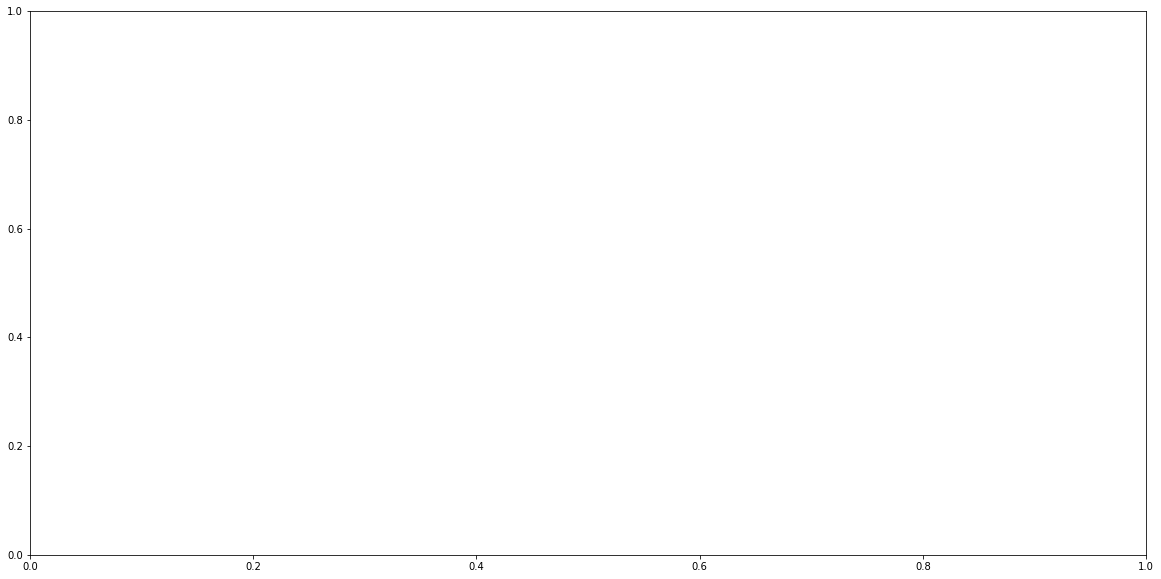

In [35]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(bike=bike[['tripduration',
                       'bikeid',
                       'usertype']],
            x='bikeid', y='tripduration',
            hue='usertype', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")